In [490]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

import os
import pickle

In [491]:
path = "../data/"
os.listdir(path)

['swes-numpy-0-M180-N90-T50-1-h',
 'swes-numpy-2-M180-N90-T50-1-v',
 'swes-numpy-0-M180-N90-T5-1-h',
 'swes-numpy-0-M180-N90-T5-1-u',
 'swes-numpy-0-M180-N90-T50-1-u',
 'swes-numpy-1-M180-N90-T20-1-h',
 'swes-numpy-2-M180-N90-T15-1-u',
 'swes-numpy-3-M180-N90-T20-1-v',
 'swes-numpy-2-M180-N90-T15-1-h',
 'swes-numpy-3-M180-N90-T5-1-v',
 'swes-numpy-1-M180-N90-T20-1-u',
 'swes-numpy-0-M180-N90-T5-D1-A0-v',
 'swes-numpy-3-M180-N90-T50-1-v',
 'swes-numpy-1-M180-N90-T50-1-h',
 'swes-numpy-2-M180-N90-T5-1-v',
 'swes-numpy-1-M180-N90-T50-1-u',
 'swes-numpy-2-M180-N90-T20-1-v',
 'swes-numpy-0-M180-N90-T20-1-h',
 'swes-numpy-1-M180-N90-T5-1-h',
 'swes-numpy-0-M180-N90-T20-1-u',
 'swes-numpy-1-M180-N90-T5-1-u',
 'swes-numpy-2-M180-N90-T50-1-u',
 'swes-numpy-0-M180-N90-T50-1-v',
 'swes-numpy-0-M180-N90-T5-1-v',
 'swes-numpy-2-M180-N90-T50-1-h',
 'swes-numpy-2-M180-N90-T15-1-v',
 'swes-numpy-3-M180-N90-T5-1-h',
 'swes-numpy-3-M180-N90-T20-1-u',
 'swes-numpy-1-M180-N90-T20-1-v',
 'swes-numpy-3-M180

In [492]:
# unpickle the data
test_case = "1"
run_time = "T50"

h_data = pickle.load(
    open(path + "swes-numpy-" + test_case + "-M180-N90-" + run_time + "-1-h", "rb")
)
u_data = pickle.load(
    open(path + "swes-numpy-" + test_case + "-M180-N90-" + run_time + "-1-u", "rb")
)
v_data = pickle.load(
    open(path + "swes-numpy-" + test_case + "-M180-N90-" + run_time + "-1-v", "rb")
)

t = h_data[2]
phi = h_data[3][1:-1, :]
theta = h_data[4][1:-1, :]
phi1d = phi[:, 0]
theta1d = theta[0, :]
h = h_data[5]
u = u_data[5]
v = v_data[5]
u_mag = np.sqrt(u ** 2 + v ** 2)

print(phi.shape, theta.shape, h.shape)

(181, 92) (181, 92) (181, 92, 1385)


(0.0, 6.283185307179586)

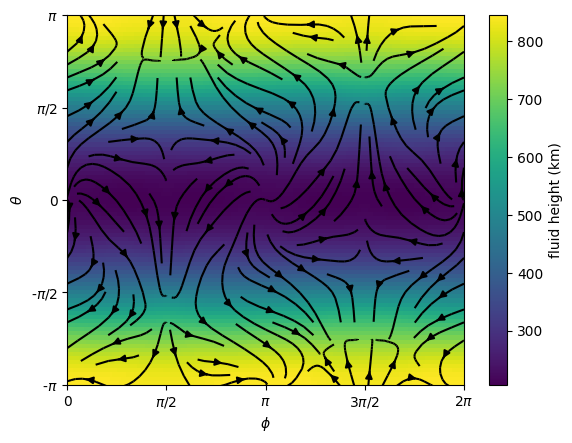

In [493]:
timestep = 100
quiver_stride = 5
plt.pcolormesh(phi, theta, h[:, :, timestep]/1e3)
# color bar with label
cbar = plt.colorbar()
cbar.set_label("fluid height (km)")

# plt.quiver(
#     phi[::quiver_stride, ::quiver_stride],
#     theta[::quiver_stride, ::quiver_stride],
#     u[::quiver_stride, ::quiver_stride, timestep],
#     v[::quiver_stride, ::quiver_stride, timestep],
# )

plt.streamplot(
    phi.T,
    theta.T,
    u[:, :, timestep].T,
    v[:, :, timestep].T,
    color="k",
)

plt.ylabel(r"$\theta$")
plt.yticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.ylim(-np.pi, np.pi)
plt.xlabel(r"$\phi$")
plt.xticks(
    np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"]
)
plt.xlim(0, 2 * np.pi)

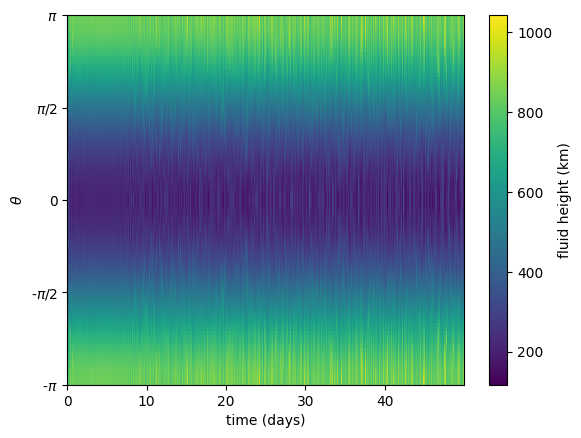

In [495]:
# hovmöller diagram along phi = 0

# find index closest to phi = 0
phi_0 = np.argmin(np.abs(phi[0, :]))
plt.ylabel(r"$\theta$")
plt.yticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.ylim(-np.pi, np.pi)
plt.xlim(0, np.max(t[:, 0] / 3600 / 24))

plt.xlabel("time (days)")

plt.pcolormesh(t[:, 0] / 3600 / 24, theta[0, :], h[phi_0, :, :] / 1e3)
# plt.pcolormesh(t[:,0]/3600,theta[0,:], np.mean(h[:, :, :], axis=0))
cbar = plt.colorbar()
cbar.set_label("fluid height (km)")

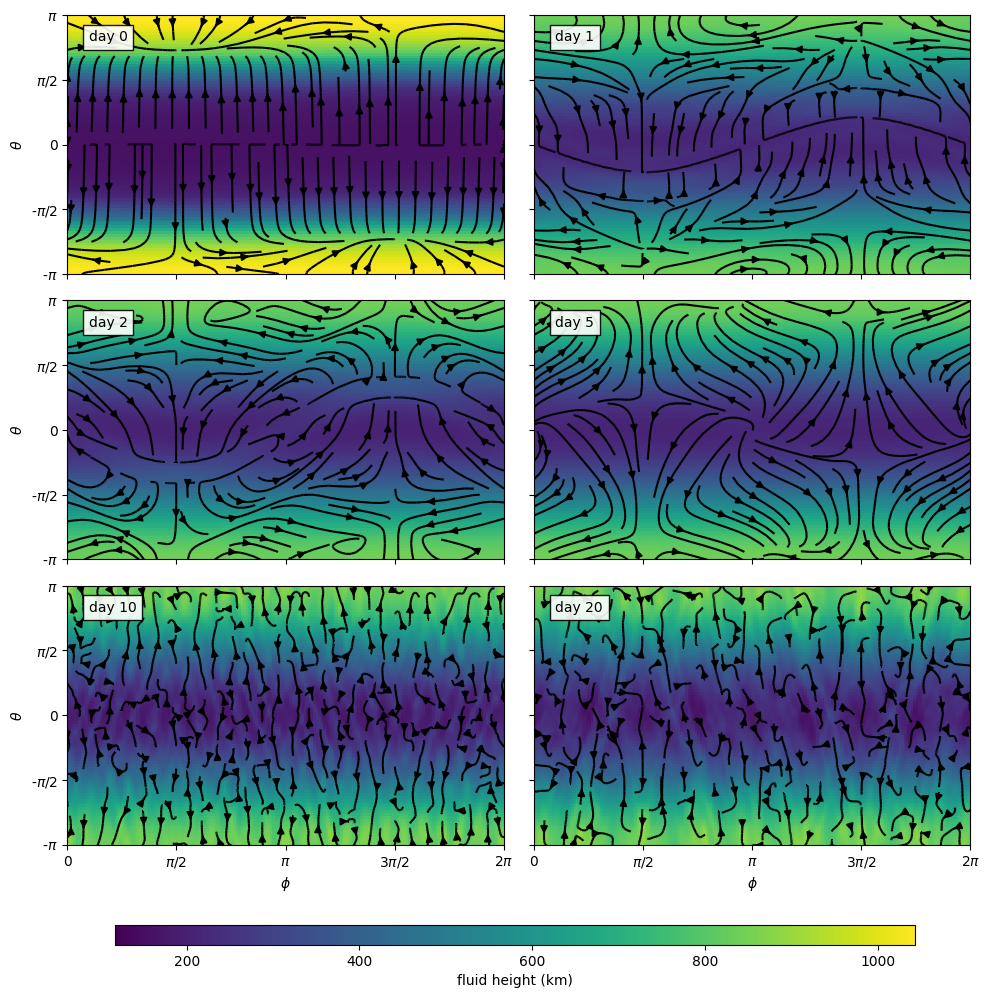

In [535]:
# 6 panels that plot the days

fig, axes = plt.subplots(3, 2, figsize=(10, 10),sharex=True,sharey=True)

days = [0,1,2,5,10,20,50]

# find the closest timestep to the days
timesteps = [np.argmin(np.abs(t/3600/24 - day)) for day in days]

cbar_max = np.max(h)/1e3
cbar_min = np.min(h)/1e3

for i,ax in enumerate(axes.flatten()):

    pmesh = ax.pcolormesh(phi, theta, h[:, :, timesteps[i]]/1e3, vmin=cbar_min, vmax=cbar_max)
    # color bar with label

    # ax.quiver(
    #     phi[::quiver_stride, ::quiver_stride],
    #     theta[::quiver_stride, ::quiver_stride],
    #     u[::quiver_stride, ::quiver_stride, timestep],
    #     v[::quiver_stride, ::quiver_stride, timestep],
    # )

    ax.streamplot(
        phi.T,
        theta.T,
        u[:, :, timesteps[i]].T,
        v[:, :, timesteps[i]].T,
        color="k",
    )

    ax.set_yticks(
        np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
    )
    ax.set_ylim(-np.pi, np.pi)
    ax.set_xticks(
        np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"]
    )
    ax.set_xlim(0, 2 * np.pi)

    # add text of day in white box
    ax.text(0.05, 0.9, f"day {days[i]}", transform=ax.transAxes, color="k",bbox = dict(facecolor = 'white', alpha = 0.9))

    # only first column
    if i % 2 == 0:
        ax.set_ylabel(r"$\theta$")

    # only last row
    if i > 3:
        ax.set_xlabel(r"$\phi$")

# tight axes
fig.tight_layout()
fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.12, 0.05, 0.8, 0.02])
cbar = fig.colorbar(pmesh, cax=cbar_ax, orientation="horizontal")

cbar.set_label("fluid height (km)")

# save figure
fig.savefig("toroidal_height_time_panels.png", dpi=300)

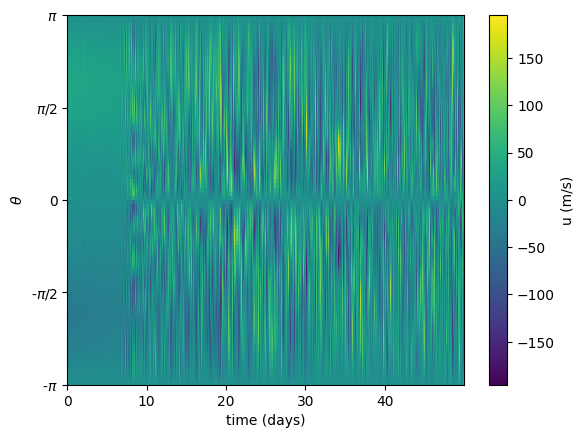

In [496]:
plt.ylabel(r"$\theta$")
plt.yticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.ylim(-np.pi, np.pi)

plt.xlabel("time (days)")
plt.xlim(0, np.max(t[:, 0] / 3600 / 24))

plt.pcolormesh(t[:, 0] / 3600 / 24, theta[0, :], u[phi_0, :, :])
# plt.pcolormesh(t[:,0]/3600,theta[0,:], np.mean(h[:, :, :], axis=0))
cbar = plt.colorbar()
cbar.set_label("u (m/s)")

In [497]:
def plt_toroid(theta,phi,h):
    aspect_ratio = 0.4
    c, a = 1, aspect_ratio
    x = (c + a * np.cos(theta)) * np.cos(phi)
    y = (c + a * np.cos(theta)) * np.sin(phi)
    z = a * np.sin(theta)

    fig = plt.figure(figsize=(15, 10))
    ax1 = fig.add_subplot(121, projection="3d")
    ax1.set_zlim(-1, 1)
    my_col = cm.plasma(h)
    ax1.plot_surface(
        x, y, z, rstride=1, cstride=1, facecolors=my_col, linewidth=0, antialiased=False
    )
    ax1.view_init(40, 10)
    # hide axis
    ax1.set_axis_off()
    # aspect ratio
    ax1.set_aspect("equal")
    # zoom in
    ax1.dist = 7

    return fig, ax1

/var/folders/38/2bzdl5412qz7lzzz021kxyf80000gp/T/ipykernel_56417/1344326177.py:21: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist = 7


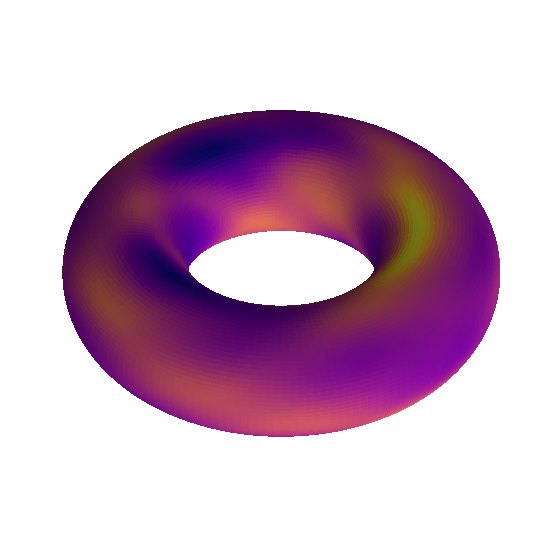

In [498]:
h_ts = h[:, :, timestep]
# normalize h from 0 to 1
h_mean = np.mean(h_ts, axis=0)
# deviation from mean
h_deviation = h_ts - h_mean
# normalize from 0 to 1
h_norm = (h_deviation - np.min(h_deviation)) / (
    np.max(h_deviation) - np.min(h_deviation)
)

plt_toroid(theta,phi,h_norm)


plt.savefig("toroidal_fluid.png", dpi=300, bbox_inches="tight")

/var/folders/38/2bzdl5412qz7lzzz021kxyf80000gp/T/ipykernel_56417/1344326177.py:21: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.dist = 7


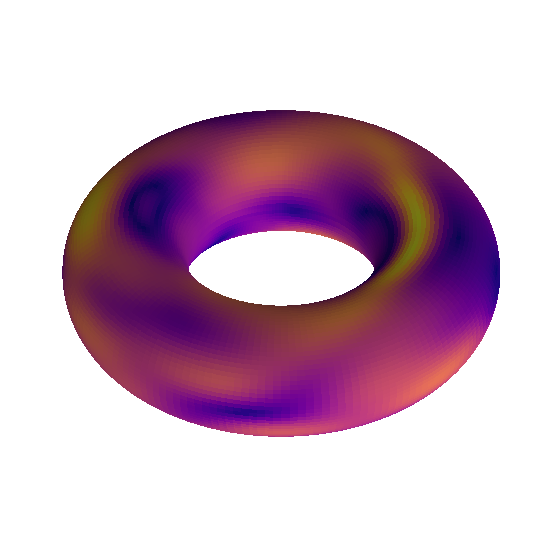

In [499]:

u_mag_ts = u_mag[:, :, timestep]
# normalize from 0 to 1
u_mag_ts = (u_mag_ts - np.min(u_mag_ts)) / (np.max(u_mag_ts) - np.min(u_mag_ts))

fig, ax = plt_toroid(theta,phi,u_mag_ts)

plt.savefig("toroidal_fluid_u.png", dpi=300, bbox_inches="tight")

Text(0.5, 1.0, 'Mean fluid height')

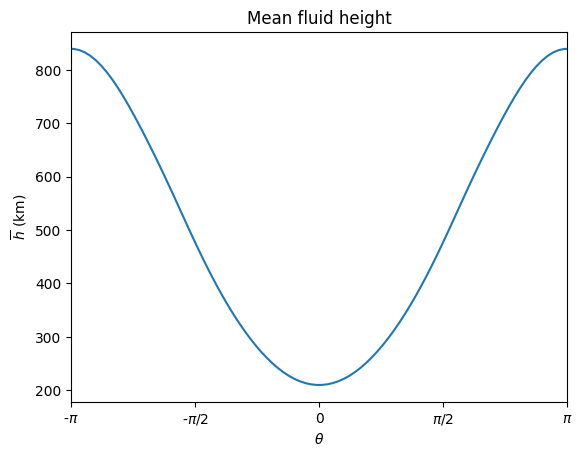

In [500]:
plt.plot(theta1d, h_mean/1e3, label="20d equilibrium")
h0 = 1.5e5
h_equilibrium_shape = -0.6*np.cos(theta1d)
h_equilibrium = h0 * h_equilibrium_shape + 2*h0
plt.xlabel(r"$\theta$")
plt.xticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.xlim(-np.pi, np.pi)

plt.ylabel(r"$\overline{h}$ (km)")
plt.title(r"Mean fluid height")

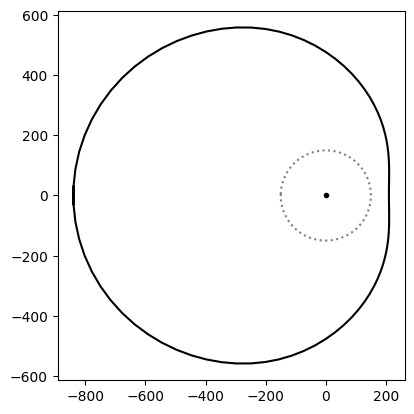

In [501]:
# crosssection of the torus mean water height

plt.plot(np.cos(theta1d) * h0/1e3, np.sin(theta1d) * h0/1e3, "k:", alpha=0.5)
plt.plot(np.cos(theta1d) * h_mean/1e3, np.sin(theta1d) * h_mean/1e3, "k-")
plt.plot(0, 0, "k.")

# equal aspect ratio
plt.gca().set_aspect("equal", adjustable="box")